In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.gridspec as gs
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

%matplotlib inline


In [2]:
churn=pd.read_csv("C:/Users/User/Downloads/Churn_Modelling.csv")

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
churn.columns = map(str.lower, churn.columns)
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
churn.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn.shape

(10000, 14)

In [9]:
churn.duplicated().sum()

0

In [10]:
churn.nunique()

rownumber          10000
customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

In [11]:
churn['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
churn['isactivemember'].unique()

array([1, 0], dtype=int64)

In [13]:
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [14]:
churn.dtypes

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [15]:
churn.exited.replace({"Yes":1, "No":0}, inplace = True)

In [16]:
churn.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
churn.tail()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [18]:
churn2=churn.drop(['rownumber','customerid','surname'], axis=1)

In [19]:
churn2.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
churn.balance = churn.balance.replace(" ", 0)

In [21]:
def plot_target_dist(churn):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(churn.exited.value_counts(),labels = ['Not exited', 'exited'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(churn.exited)
    t.set_xlabel('exited', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Customer who Exited Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

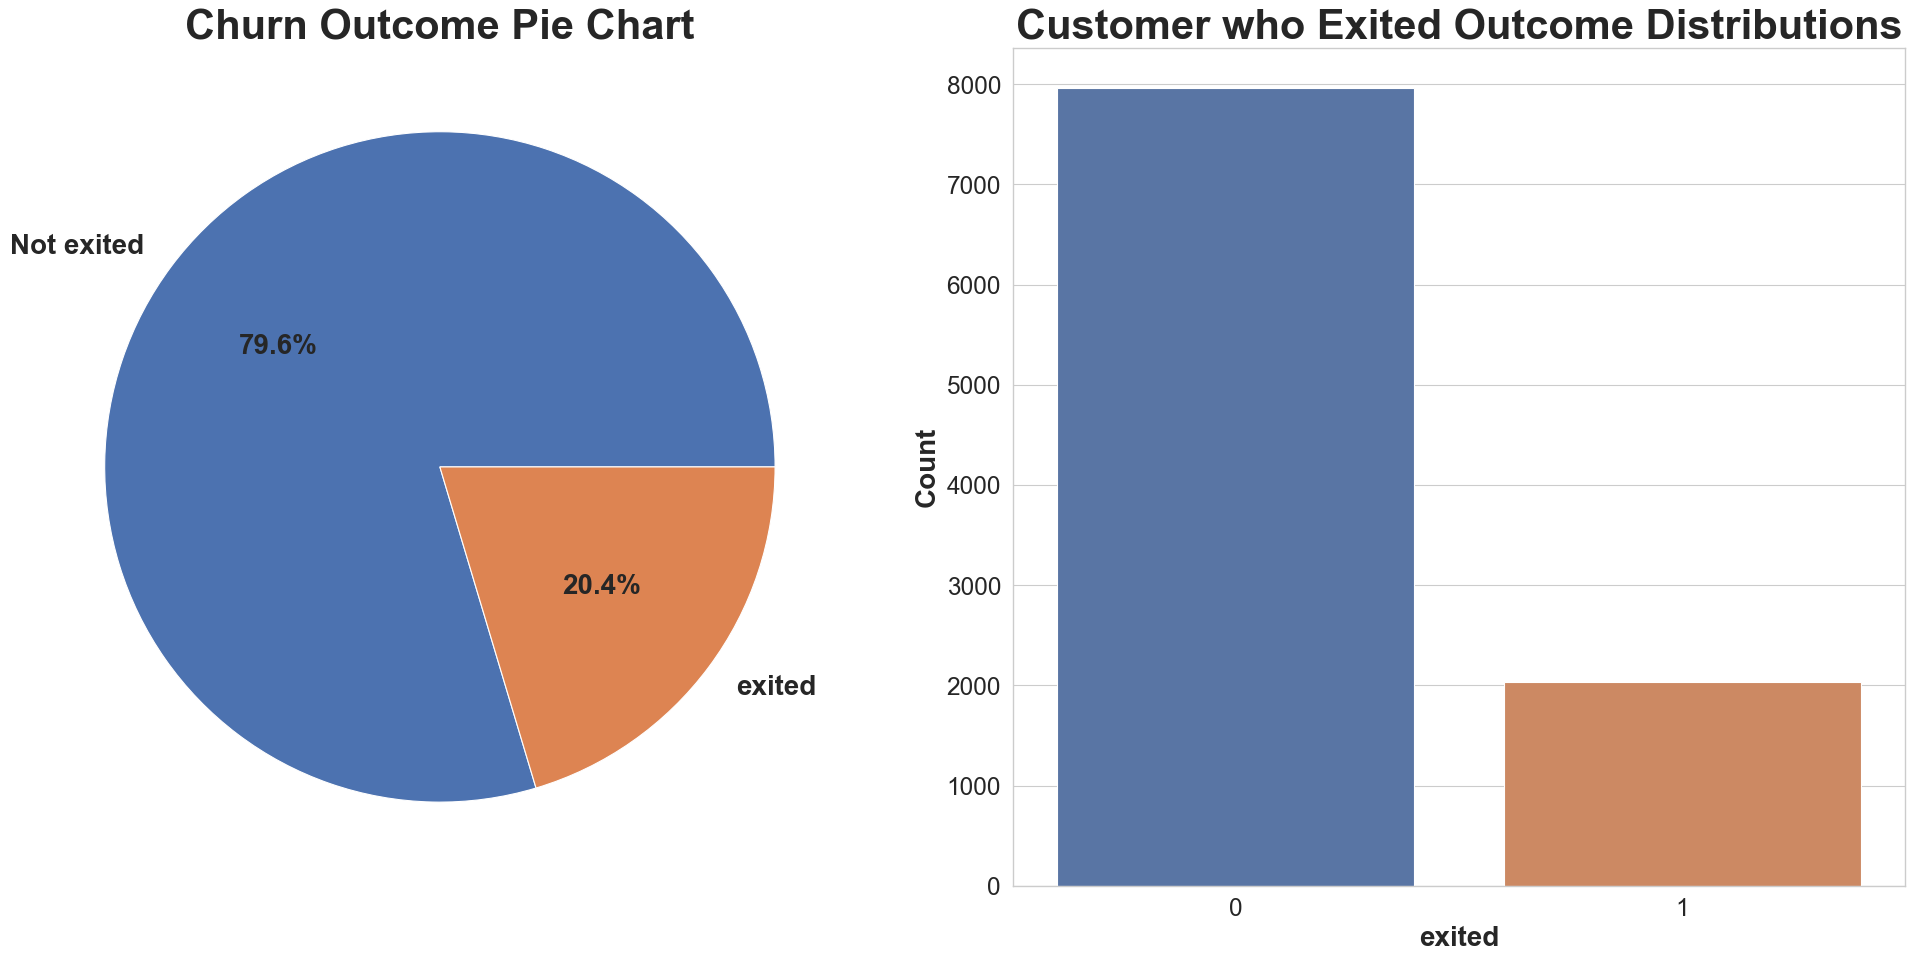

In [22]:
 plot_target_dist(churn)

In [23]:
def tenure_groups(churn):
    if churn.tenure ==0:
        return "0"
    elif(churn.tenure ==1):
         return "1"
    elif(churn.tenure ==2):
         return "2"
    elif(churn.tenure ==3):
        return "3"
    elif(churn.tenure ==4):
         return "4"
    elif(churn.tenure ==5):
         return "5"
    elif(churn.tenure ==6):
         return "6"
    elif(churn.tenure ==7):
         return "7"
    elif(churn.tenure ==8):
         return "8"
    elif(churn.tenure ==9):
         return "9"    
    elif(churn.tenure ==10):
        return "10"
    else:
        return "greatear than 10"

In [24]:
def tenure_group_counts(churn):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = churn, x = 'grouped_tenure', hue = 'exited', order = ['0','1','2','3','4','5','7','8','9','10'])
    t.set_title('Churn Counts by Tenure groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure groups ',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['Not exited', 'exited'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

In [25]:
churn['grouped_tenure'] = churn.apply(lambda churn: tenure_groups(churn), axis = 1)

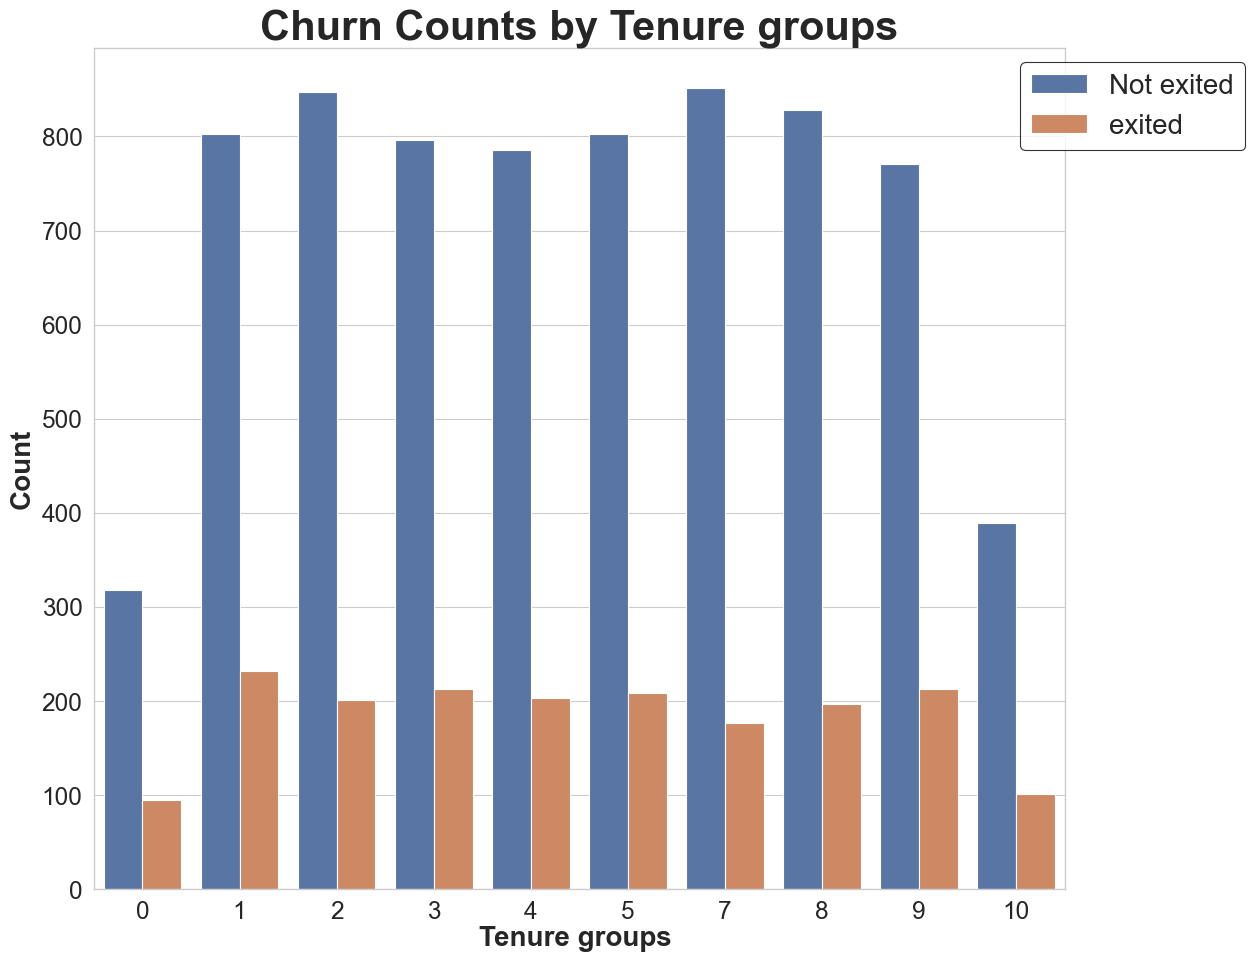

In [26]:
tenure_group_counts(churn)

In [27]:
def plot_numerical_averages(churn, feature):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = churn, x = 'grouped_tenure', y = feature, hue = 'exited', order = ['0','1','2','3','4','5','7','8','9','10'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()

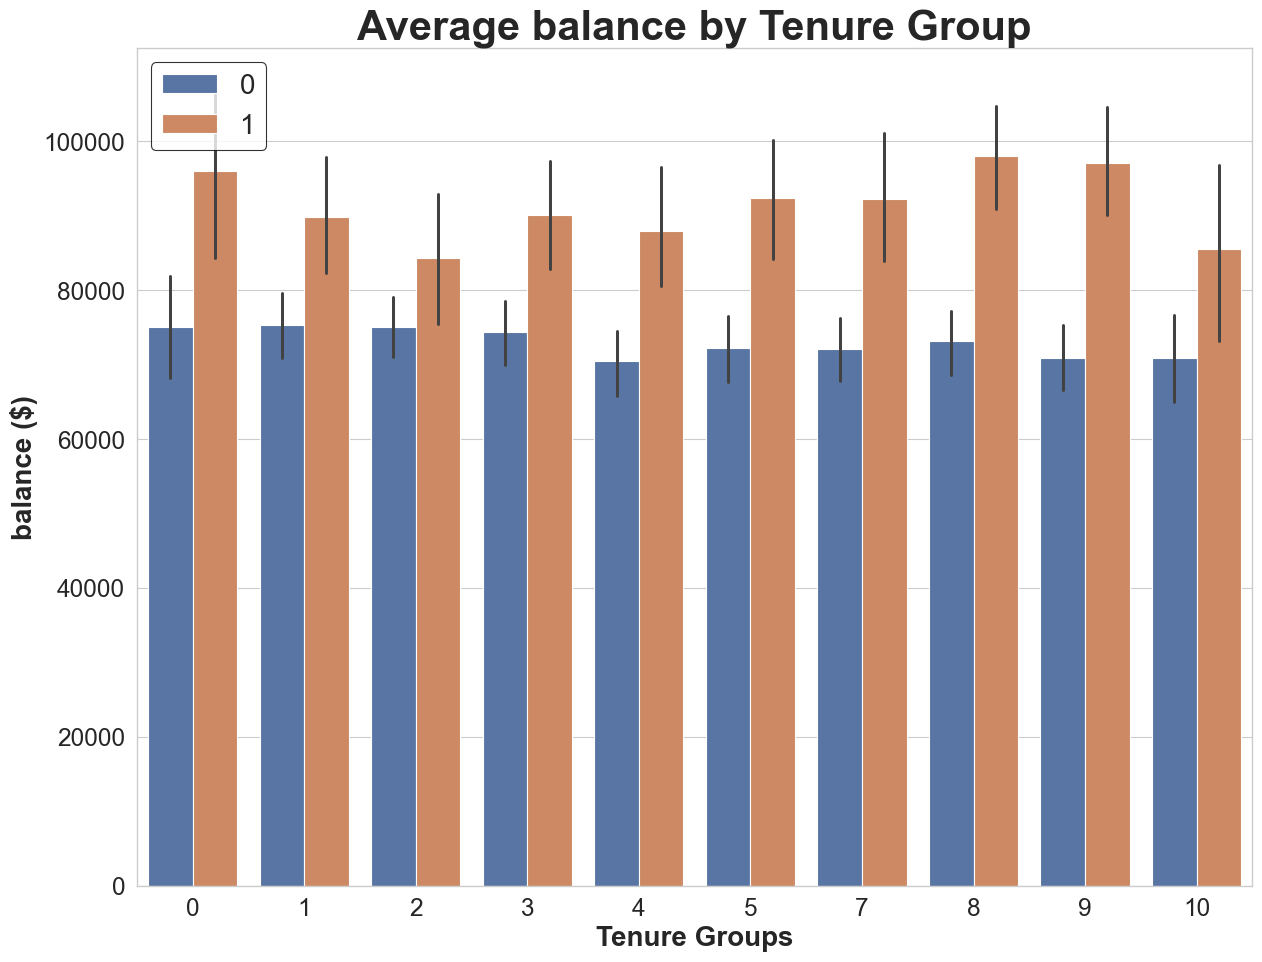

In [28]:
plot_numerical_averages(churn, 'balance')

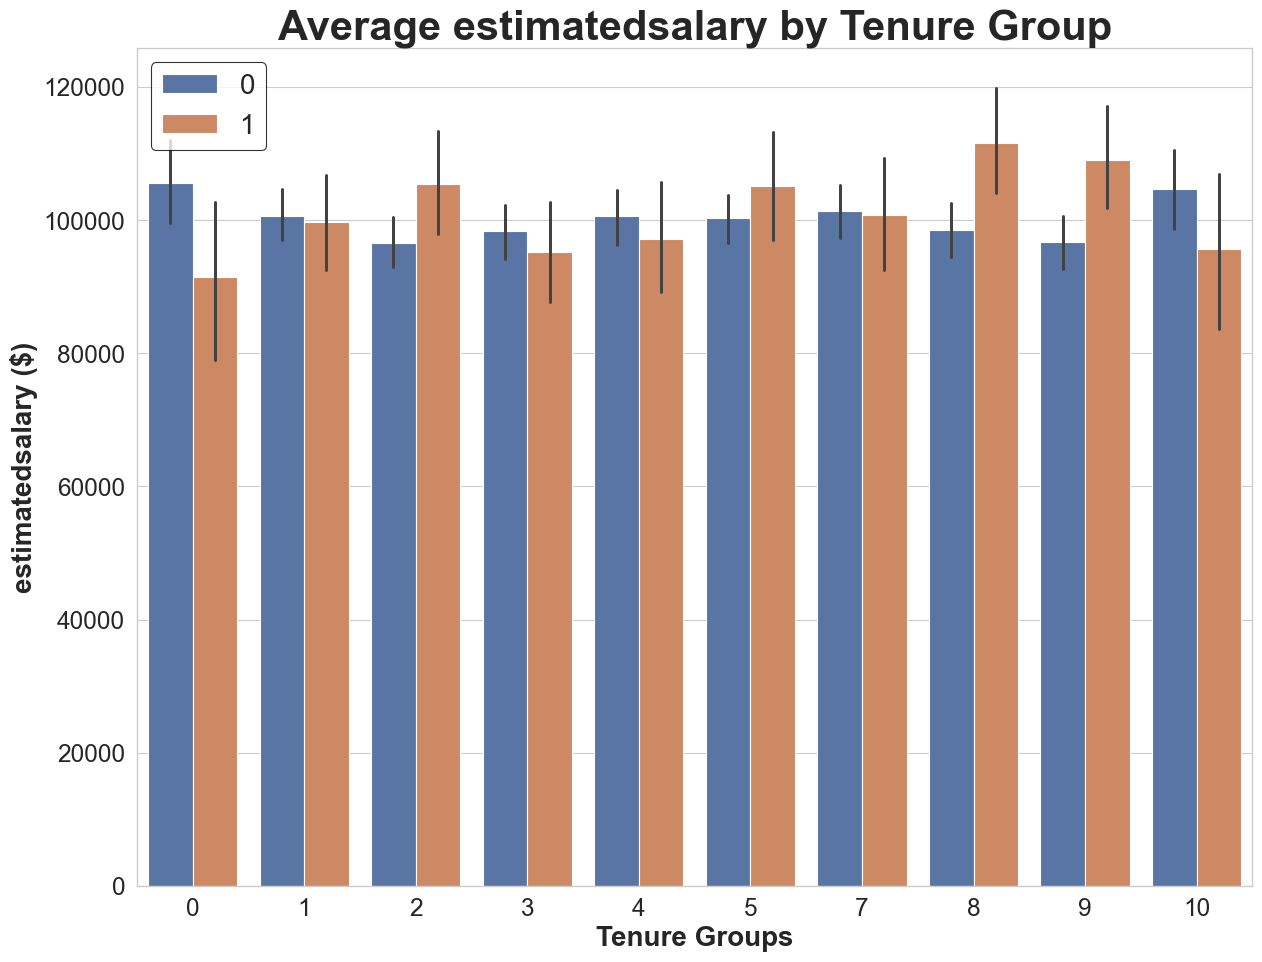

In [29]:
plot_numerical_averages(churn, 'estimatedsalary')

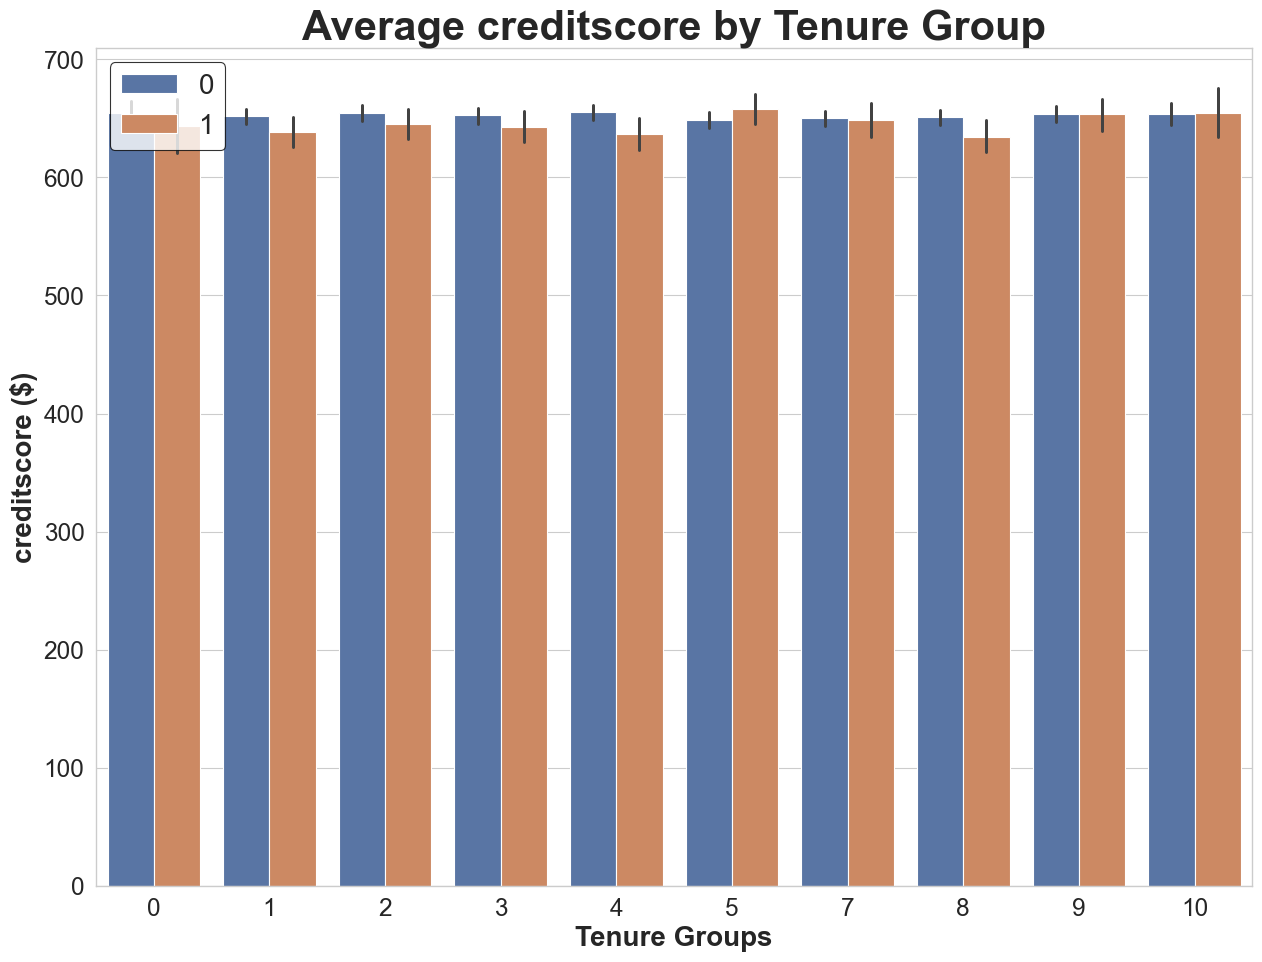

In [30]:
plot_numerical_averages(churn, 'creditscore')

In [31]:
def plot_gender_dist(churn):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(churn.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = churn, x = 'gender', hue = 'exited')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('gender', 'balance', 'exited', churn, split = True)
    x.set_title('Violin Plot: Balance by Gender', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('Gender', fontsize = 20, fontweight = 'bold')
    x.set_ylabel('Balance ', fontweight = 'bold', fontsize = 20)
    
    plt.tight_layout()

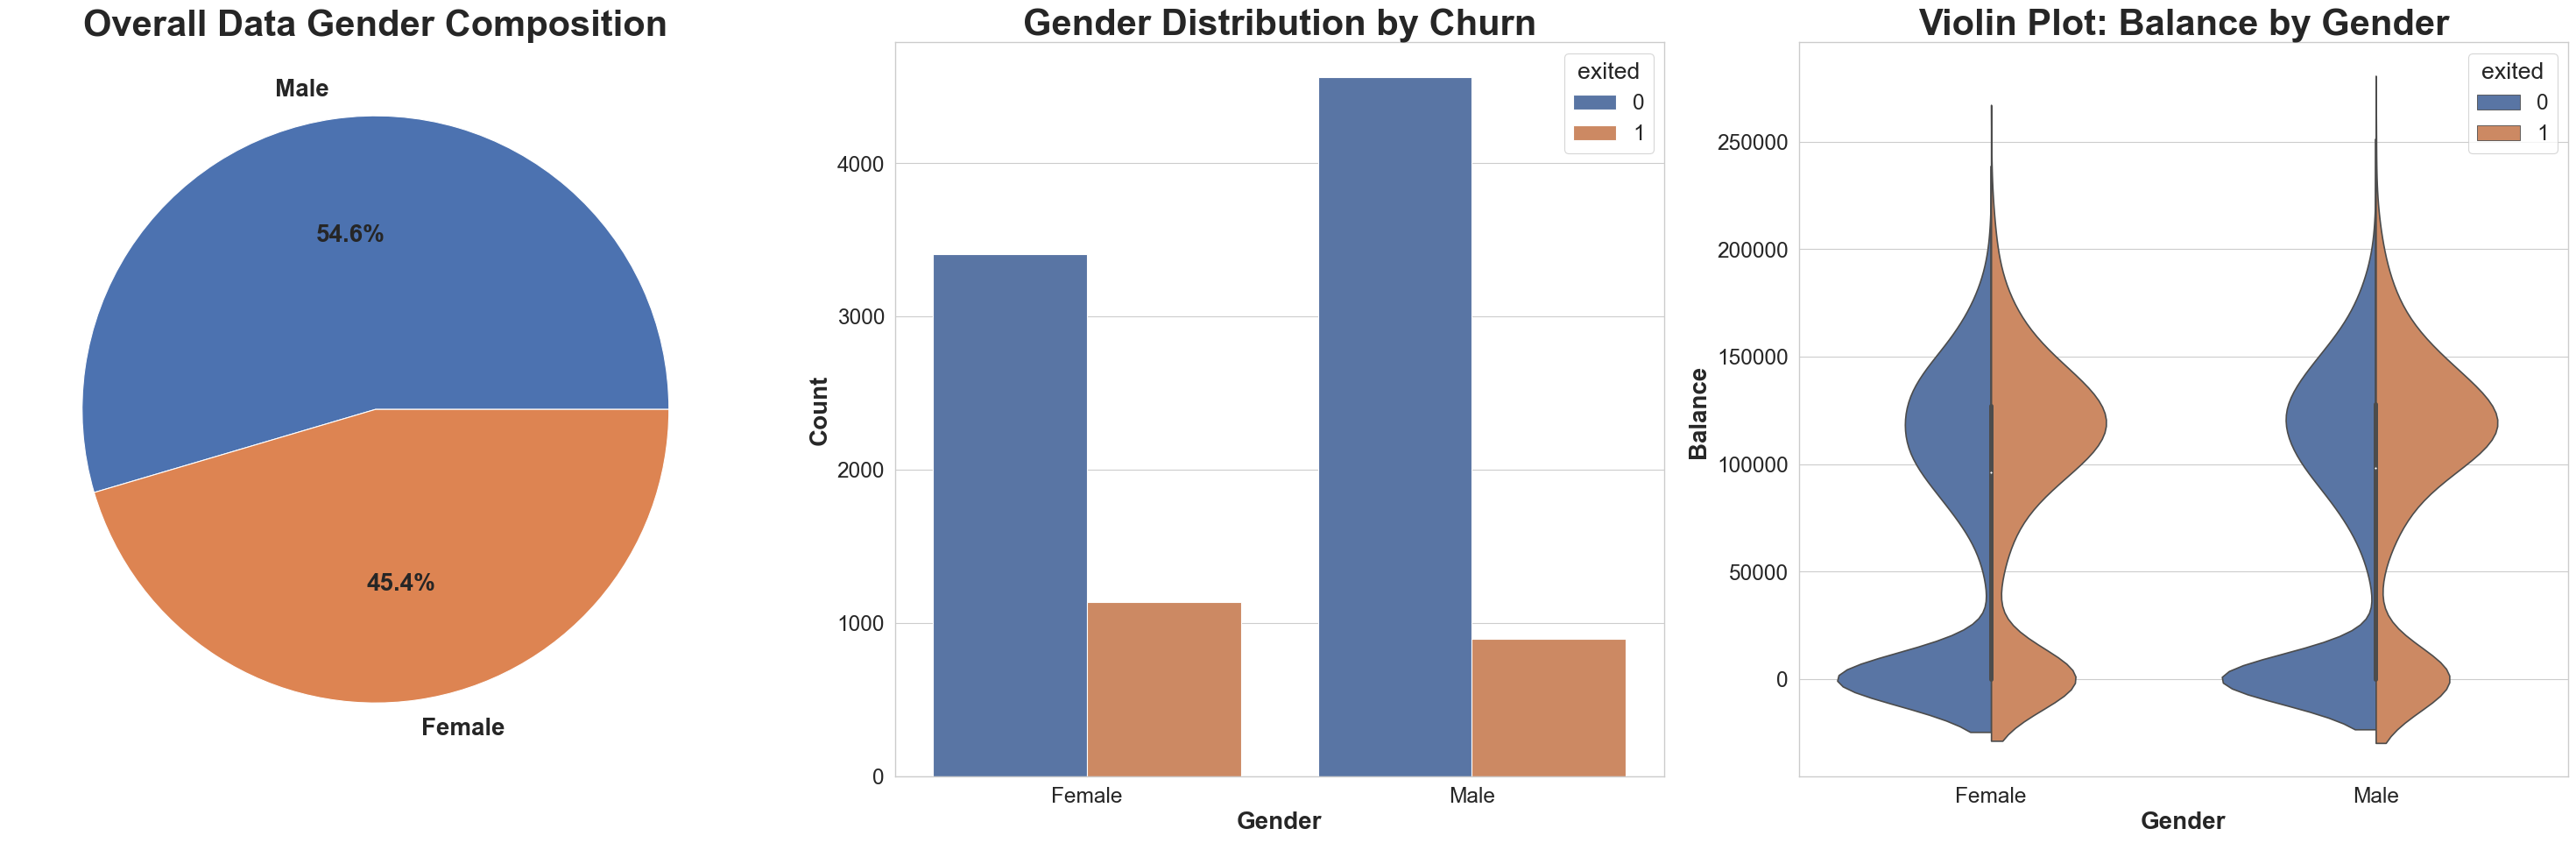

In [32]:
plot_gender_dist(churn)

In [33]:
def plot_age_dist(churn):
    
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(churn.isactivemember.value_counts(), labels = ['Non active member', 'isactivemember'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Age Composition of Overall Data', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    g = churn.copy()
    g = g.groupby('isactivemember')['exited'].value_counts().to_frame()
    g = g.rename({'exited':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(churn)) * 100
    t = sns.barplot('isactivemember', y = 'pct_total', hue = 'exited', data = g)
    t.set_title('Exited % by Age', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Non active member', 'isactivemember'], fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('isactivemember', 'estimatedsalary', 'exited', churn, split = True)
    x.set_title('Violin Plot: Balance by Age', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('')
    x.set_ylabel('Balance', fontsize = 20, fontweight = 'bold')
    x.set_xticklabels(labels = ['Non active member', 'isactivemember'], fontsize = 20, fontweight = 'bold')
    
    plt.tight_layout()

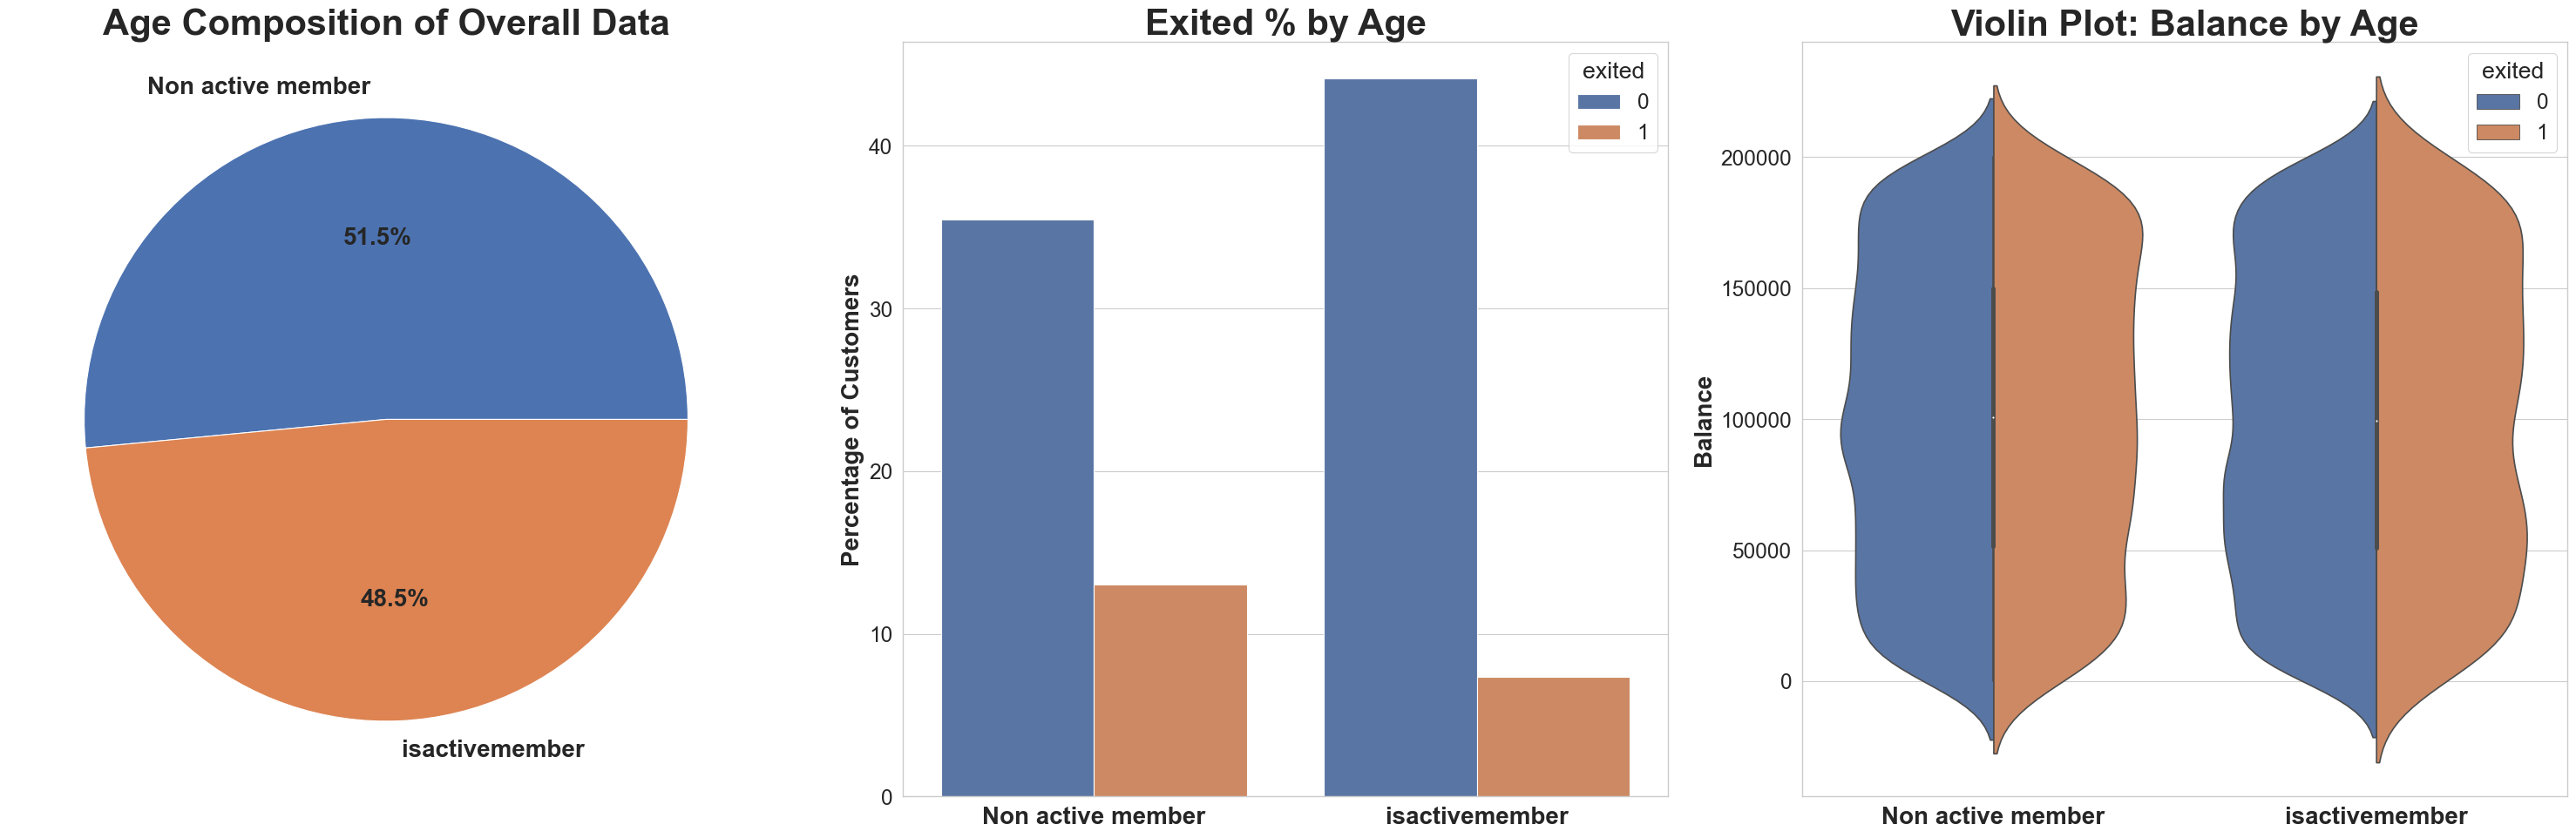

In [34]:
plot_age_dist(churn)

In [35]:
churn2.exited.replace({"Yes":1, "No":0}, inplace = True)

In [36]:
dummy_churn = pd.get_dummies(churn2)

In [37]:
dummy_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int64  
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_France   10000 non-null  uint8  
 10  geography_Germany  10000 non-null  uint8  
 11  geography_Spain    10000 non-null  uint8  
 12  gender_Female      10000 non-null  uint8  
 13  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


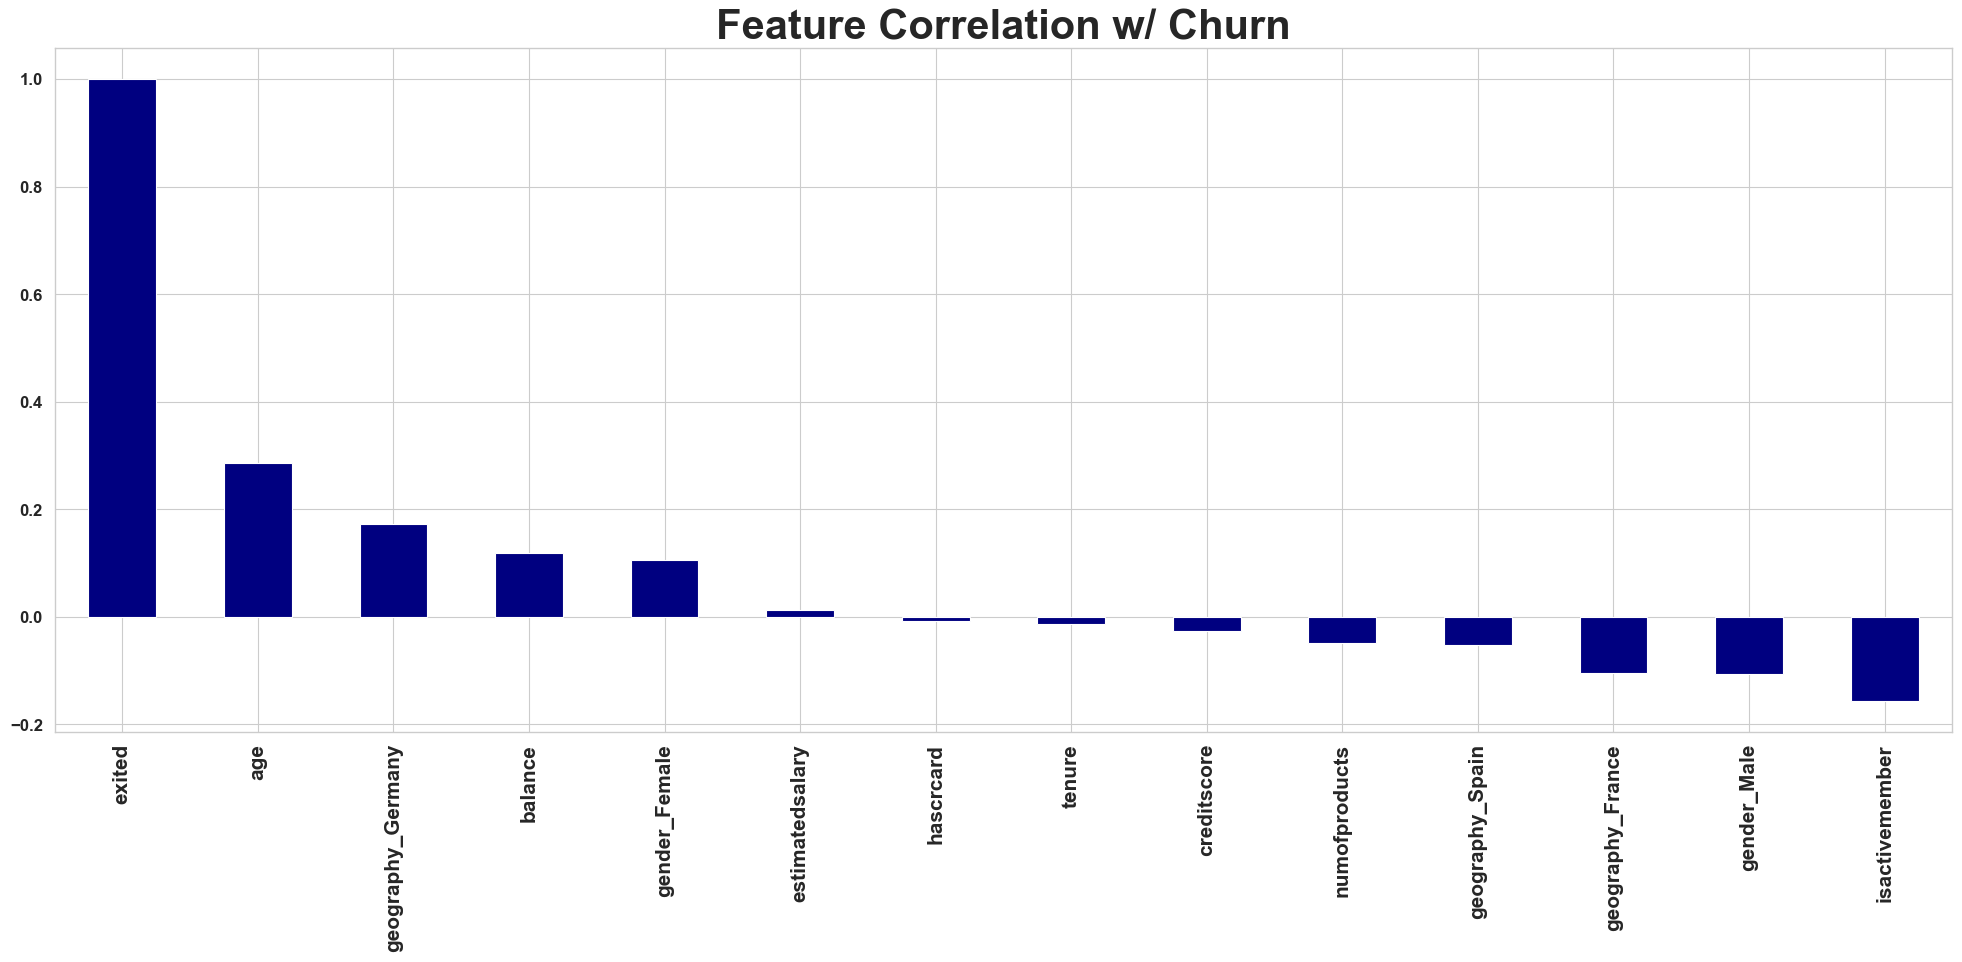

In [38]:
dummy_churn.corr()['exited'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()

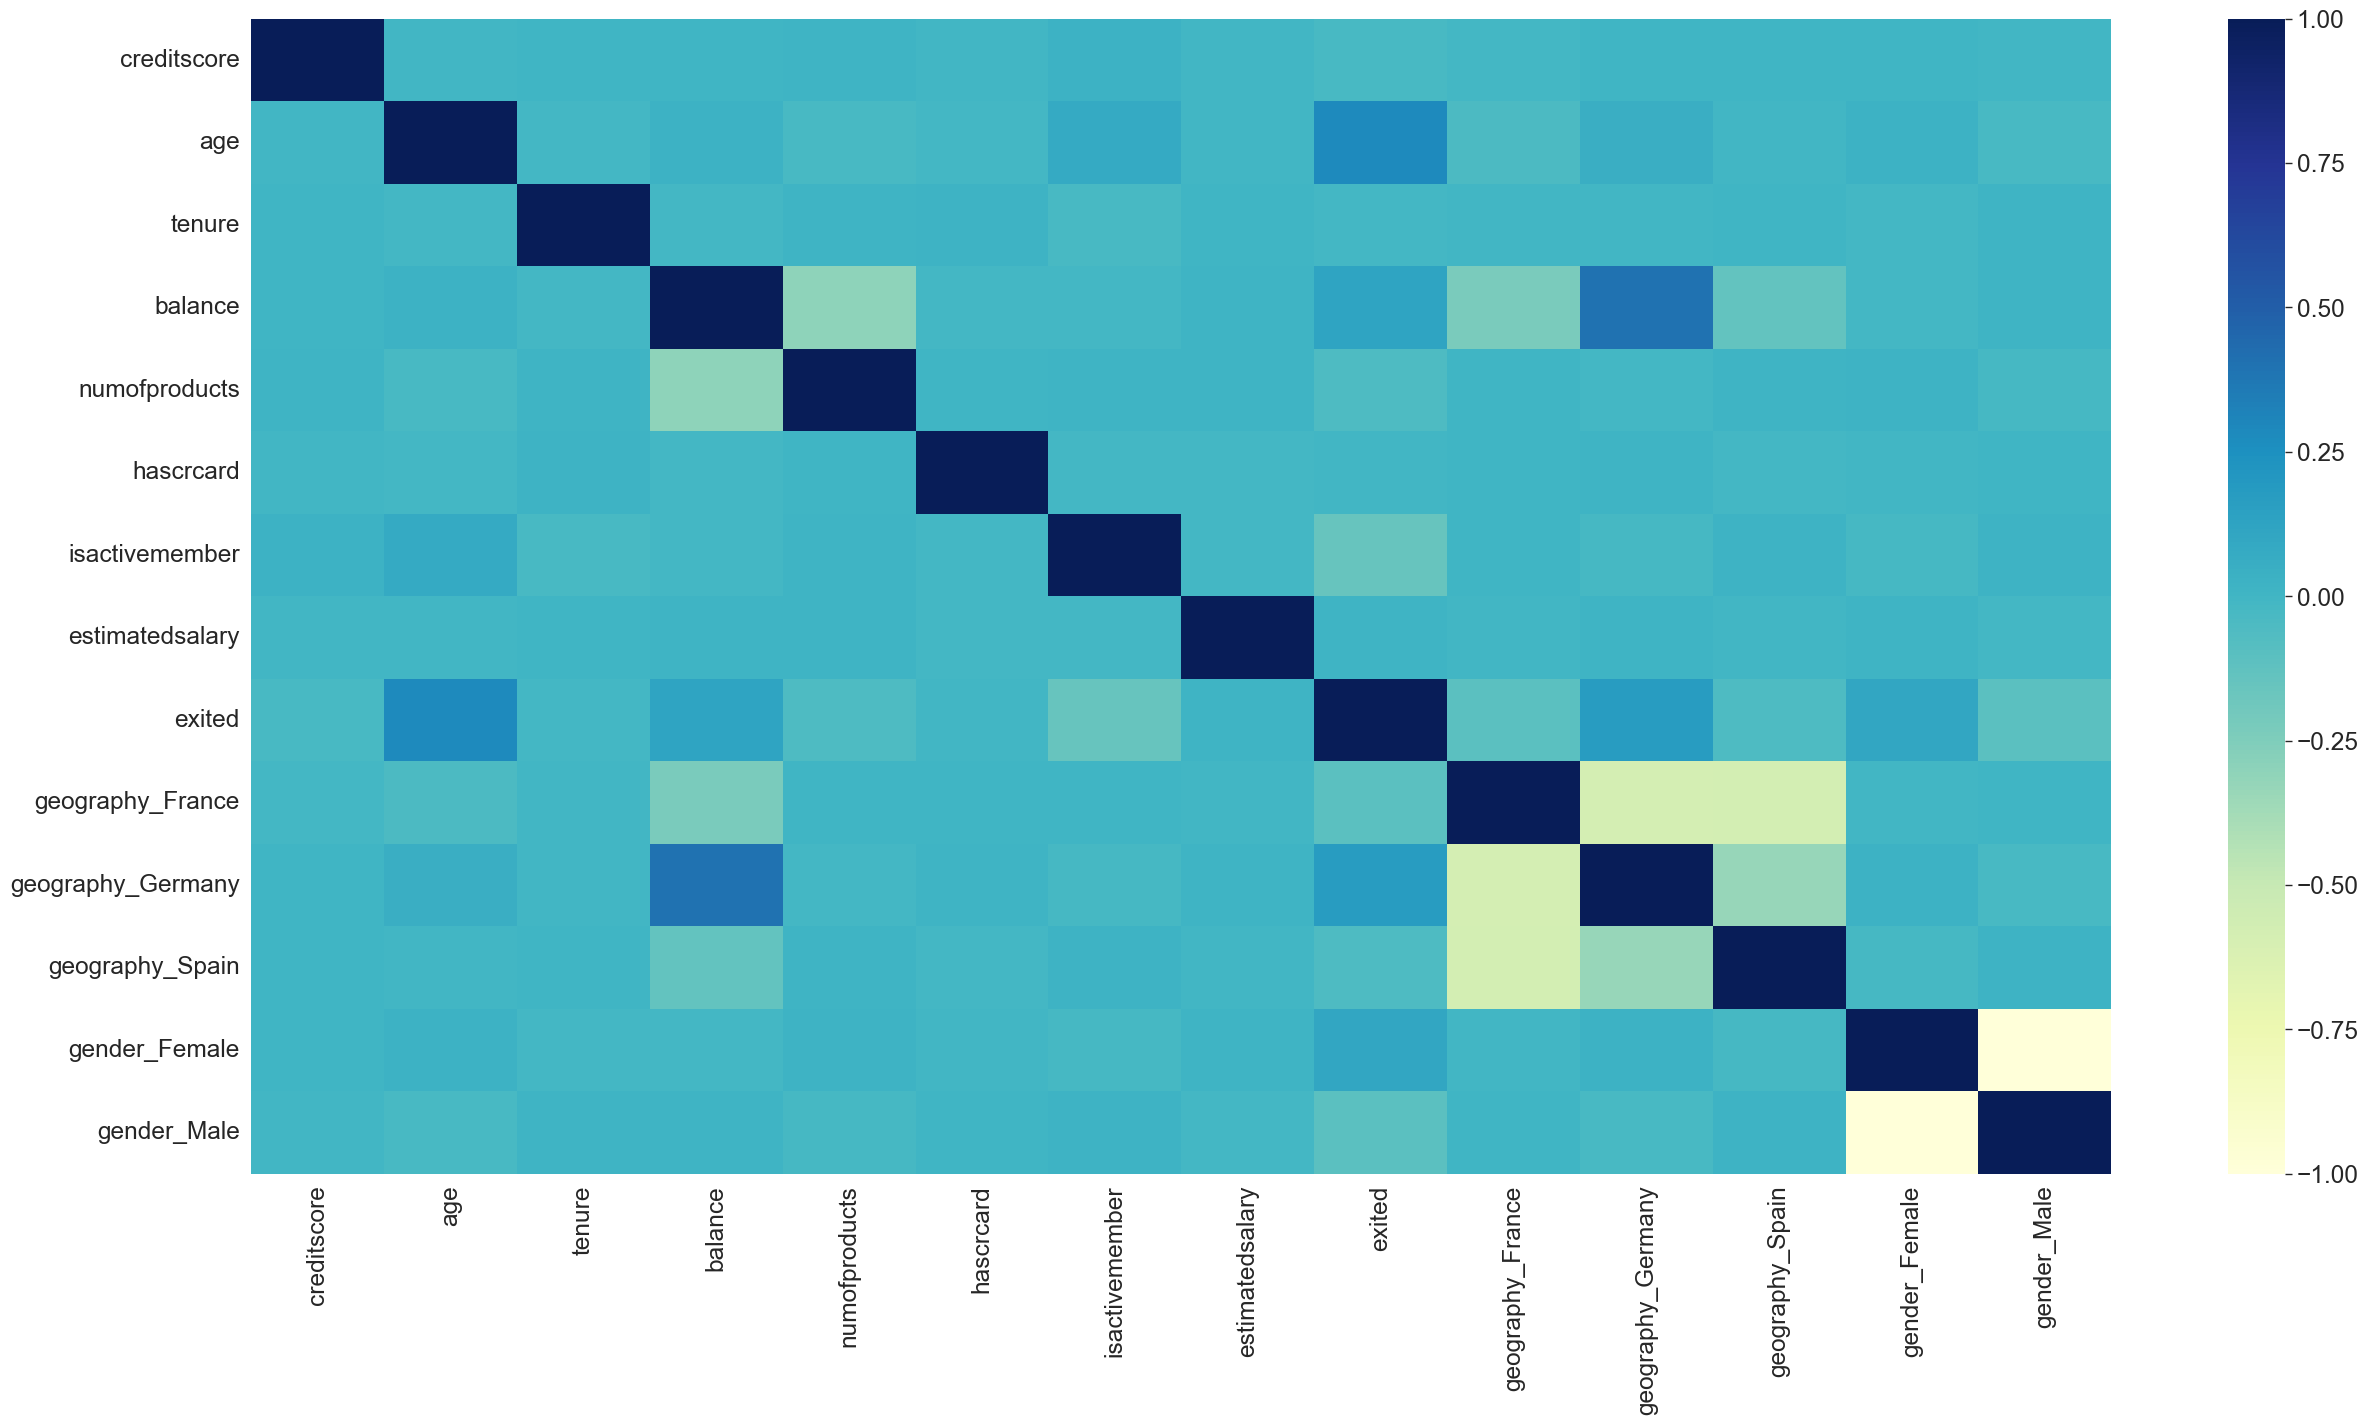

In [39]:
plt.figure(figsize = (30, 15))
x = sns.heatmap(dummy_churn.corr(), cmap = 'YlGnBu')